# Visualization of  the forest fire dataset with Matplotlib and Seaborn
The goal is to see how the burned area of forest fires, in the northeast region of Portugal, is influenced by the certain meteorological factors. So that in the long run, we can design a predictive model to predict the burned area of small fires, which are more frequent.

## Setting up: Install required packages

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\bjnis\\groupdata\\cs6010_fa2019_a05_bauer\\notebooks'

### Read the data file

In [4]:
df = pd.read_csv('./../data/forestfires.csv')

# Exploratory data analysis(EDA)

### Attribute information:

#### Predictor variables: 
* X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* month - month of the year: 'jan' to 'dec'
* day - day of the week: 'mon' to 'sun'
* FFMC - FFMC index from the FWI system: 18.7 to 96.20
* DMC - DMC index from the FWI system: 1.1 to 291.3
* DC - DC index from the FWI system: 7.9 to 860.6
* ISI - ISI index from the FWI system: 0.0 to 56.10
* temp - temperature in Celsius degrees: 2.2 to 33.30
* RH - relative humidity in %: 15.0 to 100
* wind - wind speed in km/h: 0.40 to 9.40
* rain - outside rain in mm/m2 : 0.0 to 6.4

#### Response variable:
* area - the burned area of the forest (in ha): 0.00 to 1090.84

This response variable is very skewed towards 0.0, thus it is required to
use the logarithm transformation


### Check the dimension of the data set

In [5]:
df.shape

(517, 13)

In [6]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [7]:
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

### Identification of variables and data types

In [8]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

### Summary statistics

In [9]:
summery=df.describe().transpose()
print(summery)

      count        mean         std   min    25%     50%     75%      max
X     517.0    4.669246    2.313778   1.0    3.0    4.00    7.00     9.00
Y     517.0    4.299807    1.229900   2.0    4.0    4.00    5.00     9.00
FFMC  517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC   517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC    517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI   517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp  517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH    517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind  517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain  517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area  517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84


## Missing data exploration: highlighting graphical presentation of missing pattern

#### Identifying the reason of “missingness” is very important. Missingness can occur for the following reasons: 
* It was forgotten or lost;
* It was not applicable to the instance;
* It is of no interest to the instance. 


## Exploring missing pattern: Number of missing values vs. number of  non missing values

In [10]:
#column-wise sum of missing values
print("Columnwise total missing value")
df.isnull().sum()

Columnwise total missing value


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Visual presentation of missing data pattern

## Question: What do the missing values look like?

In [11]:
sns.heatmap(df.isnull(), cbar=False)

#### **Answer:** There are no missing values.

#### This dataset has no missing values. Therefore, we can proceed to the next step of our exploration. 

## Question: Where do the fires occur the most?

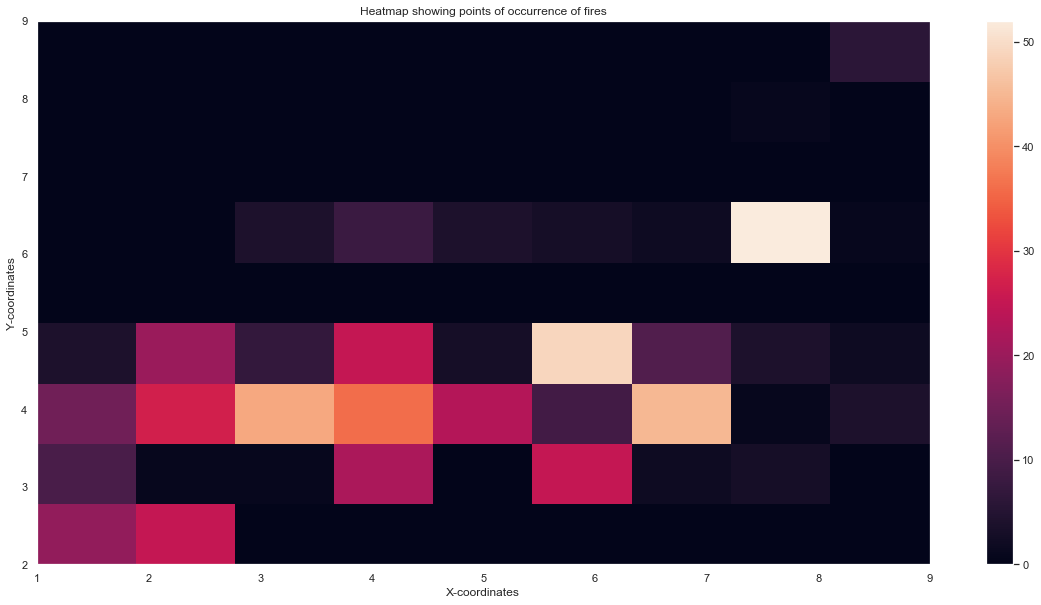

In [33]:
X = df['X']
Y = df['Y']
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
h = plt.hist2d(X,Y, bins=9)
plt.colorbar(h[3])
plt.title('Heatmap showing points of occurrence of fires')
plt.show()

Now lets try to overlay the produced heatmap on the actual map.

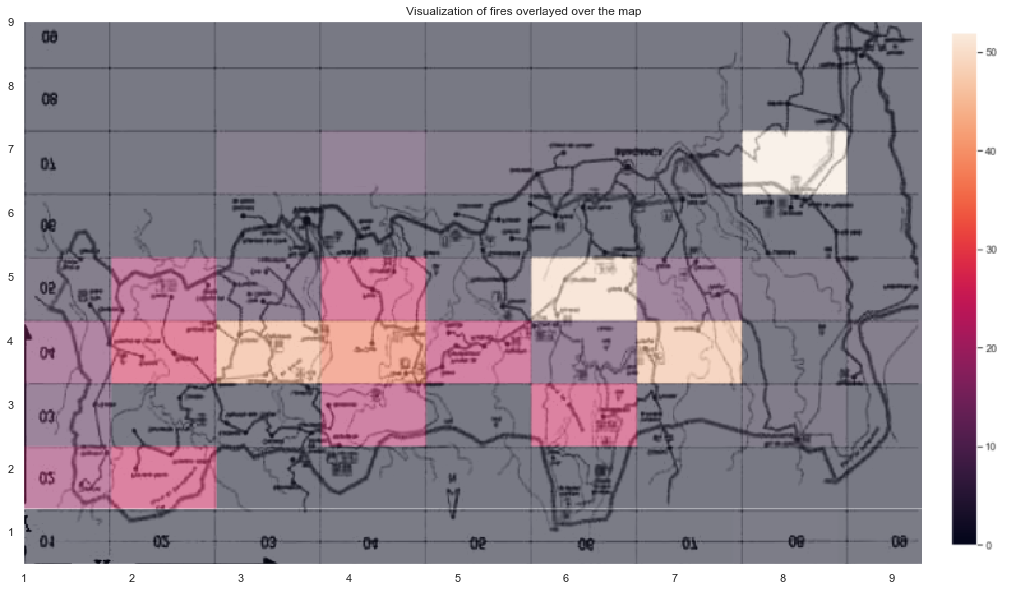

In [32]:
img = plt.imread('../visualizations/forest_fires_map.png')
x = np.array([85 * i for i in range(10)])
y = np.array([50 * i for i in range(9)])
plt.xticks(x, [i for i in range(1, 10)])
plt.yticks(y, [i for i in range(9, 0, -1)])
plt.title("Visualization of fires overlayed over the map")
plt.imshow(img)
plt.grid(b=None)
plt.show()

From the above graph, we can see which parts of the forest were more prone to fires.

## Exploration of dependent(response) variable


In [14]:
plt.hist(df['area']) 
plt.title('Histogram of burned area without log transformation\n',fontweight="bold")
plt.xlabel('Area')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

### Log-transformation
#### Question: How can we transform the data to make it more workable?

In [15]:
plt.hist(np.log(df['area'] + 1)) 
plt.title('Histogram of burned area with log transformation\n',fontweight="bold")
plt.xlabel('Area')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Density')

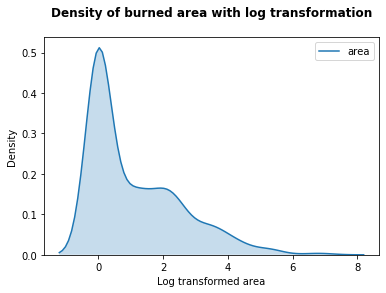

In [16]:
sns.kdeplot(np.log(df['area'] + 1), shade=True)
plt.title('Density of burned area with log transformation\n',fontweight="bold")
plt.xlabel('Log transformed area')
plt.ylabel('Density')

Text(0.5, 1.0, 'Histogram and density plot of burned area with log transformation\n')

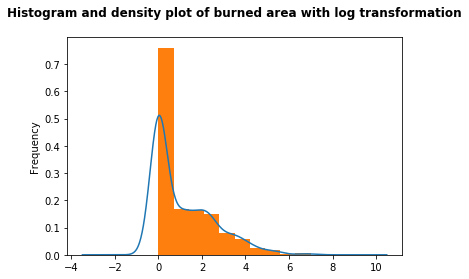

In [17]:
np.log(df['area'] + 1).plot.kde()
np.log(df['area'] + 1).plot.hist(density=True) 
plt.title('Histogram and density plot of burned area with log transformation\n',fontweight="bold")


#### **Answer:**  Since the dependent variable is highly skewed with a large number of zero value and strictly positive, we should use log-transformation. The log transformation is widely used to decrease the variability of data and make data conform more closely to the normal distribution. We see that the data is approximately normally distributed due to log-transformation!

## Exploration of intercorrelated predictor variables

### Question: Which month or months have a tendency to have a higher area burned?

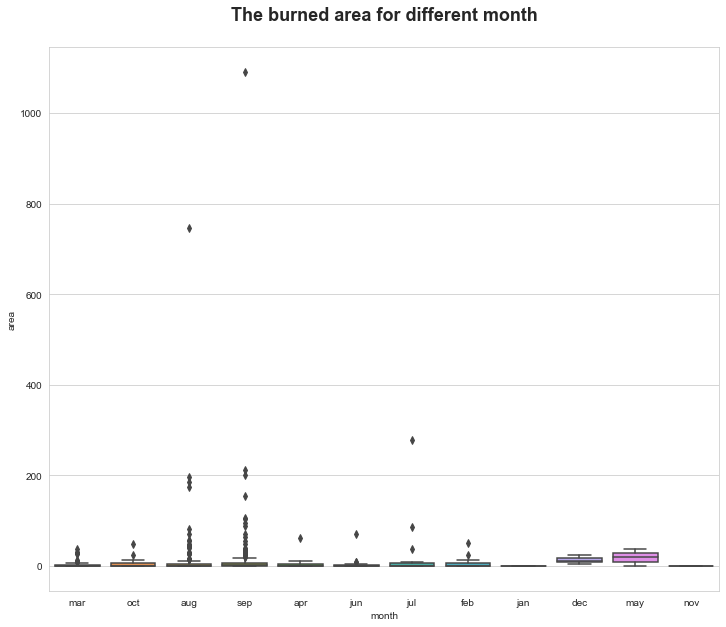

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
sns.boxplot(x='month', y='area', data=df).set_title('The burned area for different month\n', weight='bold').set_fontsize('18')


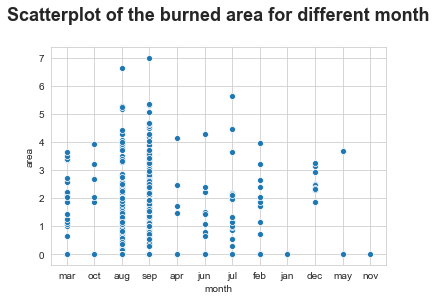

In [19]:
sns.scatterplot(x=df['month'], y=np.log(df['area']+1)).set_title('Scatterplot of the burned area for different month\n', weight='bold').set_fontsize('18');

#### **Answer:** After using a log transformation to nomalize the data, you can see that August and September by far have the most observations for forest fires. They both also have some of the highest values for area burned.

#### We observe that the number of forest fire incidents fall into every month is very unbalanced due to the presence of some outliers. We can now start to visualize the response variable along with predictor variables. 

## Question: What is the general distribution for each of these columns?

Text(0.5, 0.98, 'Data distribution of all variables')

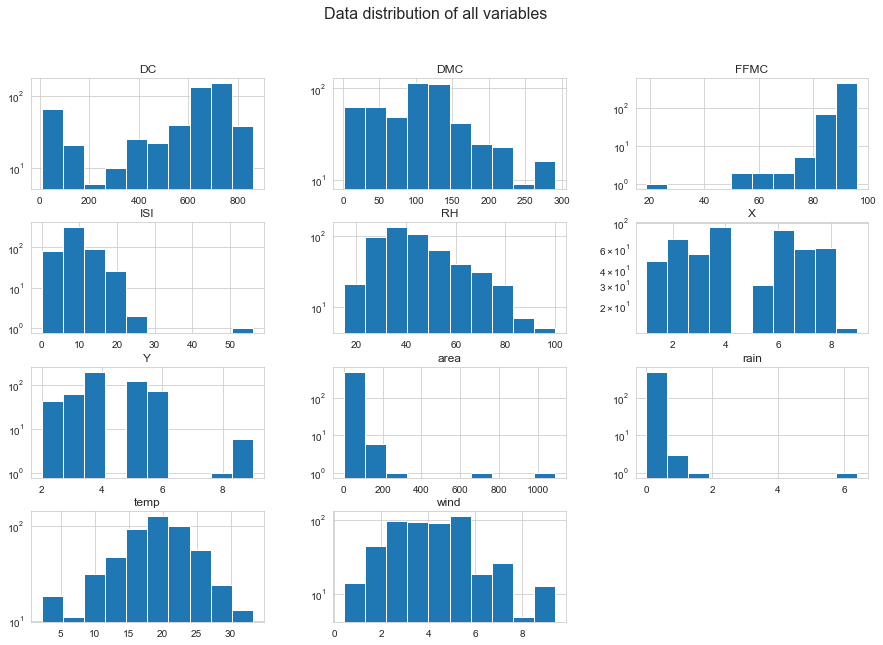

In [20]:
df.hist(figsize=(15, 10),log=True)
plt.suptitle("Data distribution of all variables", size=16)

Text(0.5, 0.98, 'Densityplot of all variables')

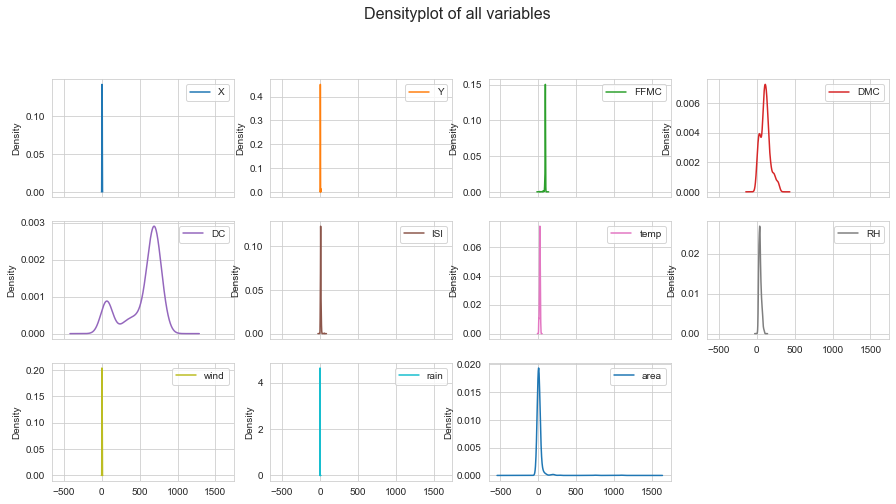

In [21]:
df.plot.density(subplots=True,layout=(4,4),figsize=(15,10))
plt.suptitle("Densityplot of all variables", size=16)

#### **Answer:** We see that rain is very right-skewed and FFMC is left-skewed. We need further analysis to decide the importance of these variables to design predictive models. 

#### Let's draw a correlation plot to determine the highly correlated variables.

## Question: What are the highly correlated variables?

Text(0.5, 0.98, 'Attributes Pairwise Plots\n')

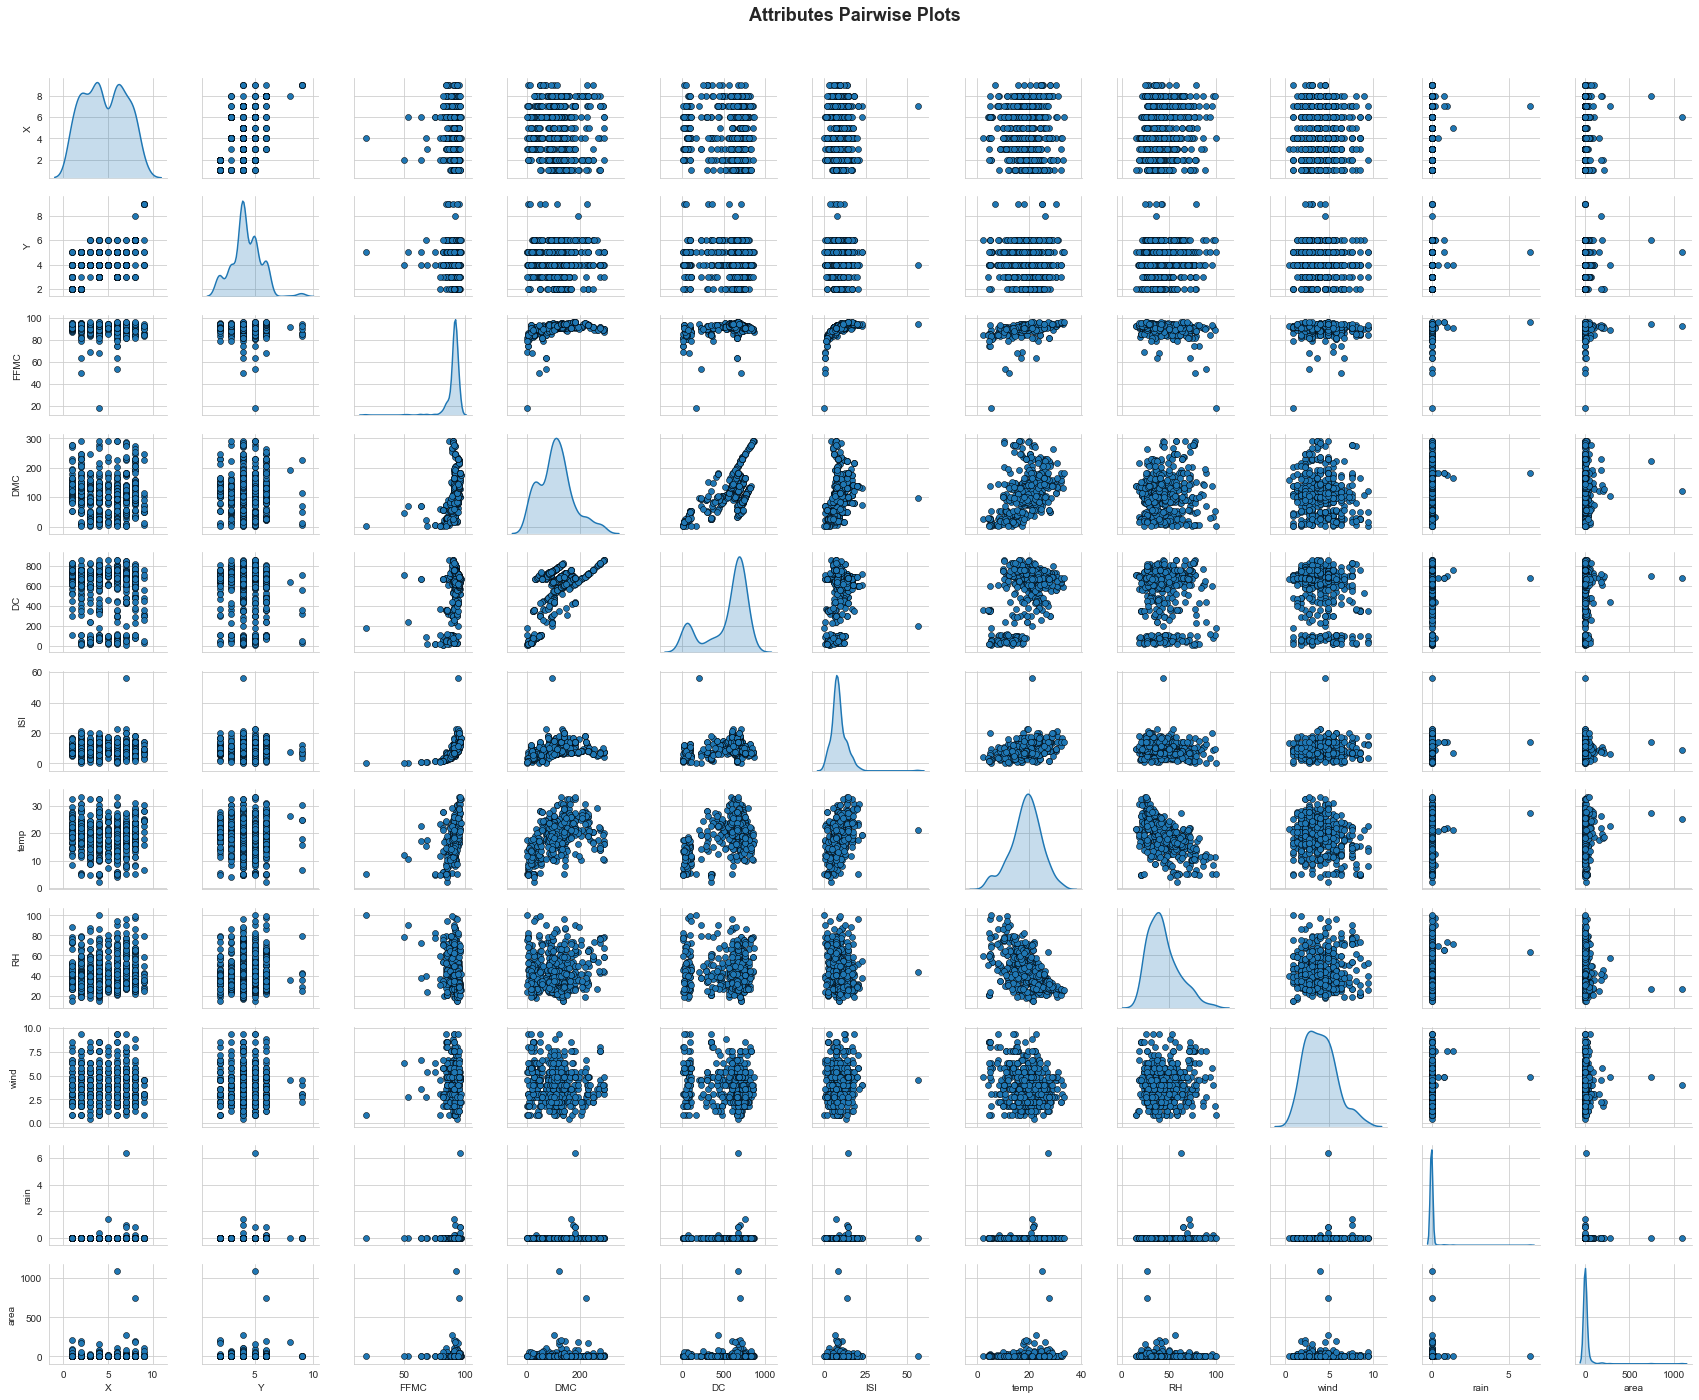

In [22]:
pp=sns.pairplot(df, vars=["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"],height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde")
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Attributes Pairwise Plots\n',fontsize=18, fontweight='bold')

#### This plot clearly exhibits some patterns between variables and exposes the outliers of our data

## Visualize a correlation matrix using seaborn heat map

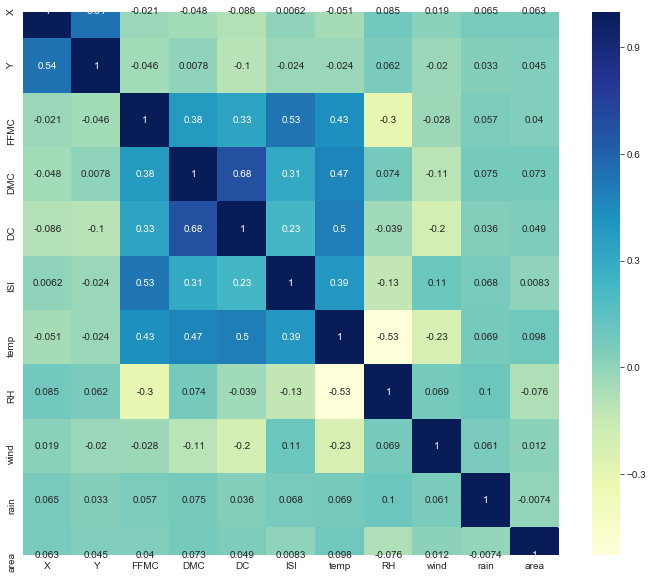

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### **Answer:** The positive correlation between variables seems to exist. DMC and DC have a high positive correlation, in contrast, Temp and RH variables have a strong negative correlation. 

### Determine the highly correlated variables

In [24]:
cor_target = abs(df.corr()["area"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.07]
relevant_features

DMC     0.072994
temp    0.097844
RH      0.075519
area    1.000000
Name: area, dtype: float64

#### We see that the response variable area is correlated with DMC, temp, and RH.

## Visualization of important variables

Text(0.5, 0.98, 'Visualizing linear relationships among important variables\n')

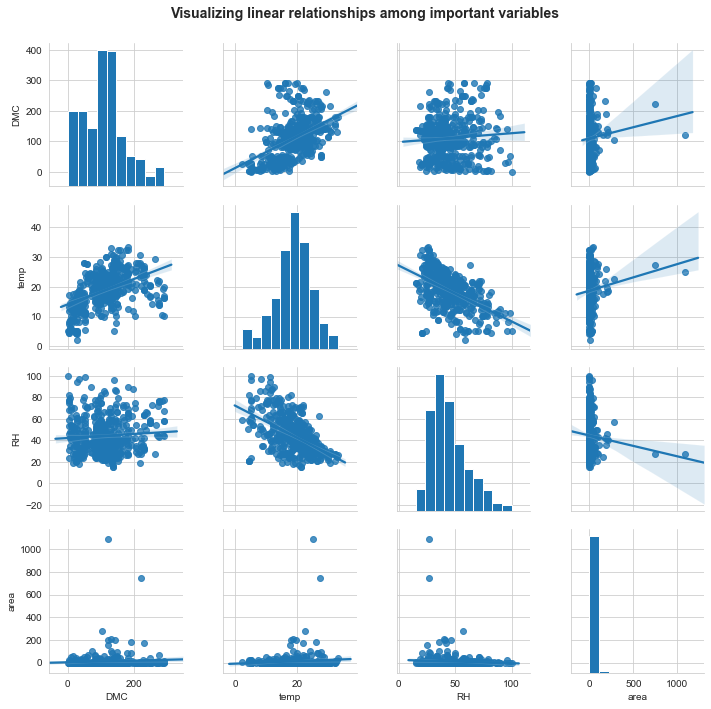

In [25]:
pp=sns.pairplot(df, vars=["DMC","temp","RH","area"], kind="reg")
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Visualizing linear relationships among important variables\n',fontsize=14, fontweight='bold')

In [26]:
my_sizes = [10,20,30,40]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="DMC", y="temp", size="area", hue="area", data=df, sizes=(50,800)).set_title('Visualization of burnt area through cluster\n',fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Visualization of burnt area through cluster\n')

In [27]:
g = sns.PairGrid(df,vars=["DMC","temp", "RH","area"],diag_sharey=False)
g.map_upper(sns.kdeplot)
g.map_lower(plt.scatter, s=2)
g.map_diag(sns.kdeplot, lw=3)

#### Therefore, we can conclude that DMC, temp, and RH will be the appropriate choice to design our predictive model in predicting the amount of land burnt. 


## Other Misc. Visualizations

### Question: What stands out for August and September's high area burn observations?

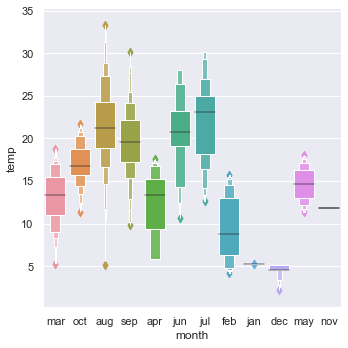

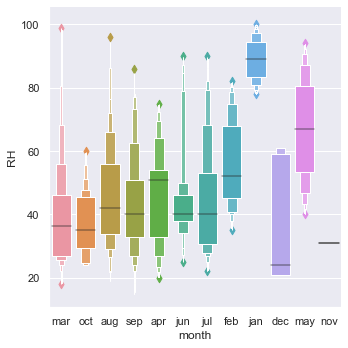

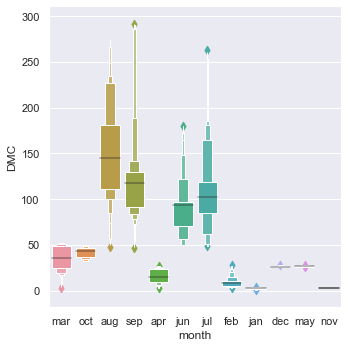

In [28]:

sns.catplot(x="month", y="temp", data=df, kind="boxen");
sns.catplot(x="month", y="RH", data=df, kind="boxen");
sns.catplot(x="month", y="DMC", data=df, kind="boxen");

#### **Answer:** What really stands out for August and September is their tendency to have a much higher DMC than every other month. They also have a slightly higher temperature that the other months.

## Question: Out of the three variables that we have identified as important, which is the best predictor area burned?

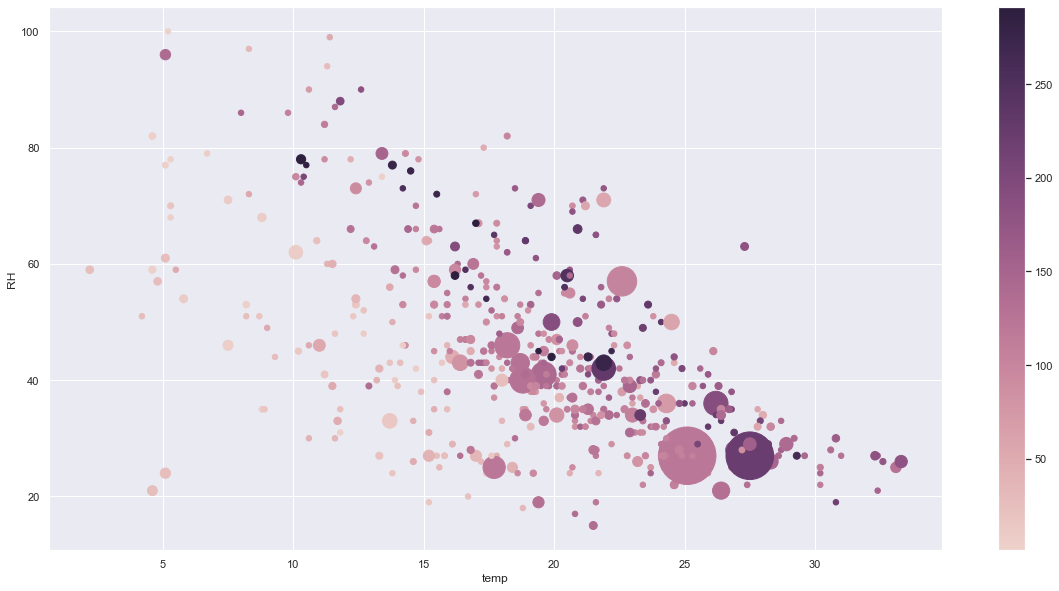

In [29]:
sns.set(rc={'figure.figsize':(20,10)})

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
plt.xlabel("temp")
plt.ylabel("RH")
points = ax.scatter(df.temp, df.RH, c=df.DMC, s=(df.area+10)*3, cmap=cmap)
f.colorbar(points)

**The color represents the DMC value and the size of the plot represents the size of area burned**

#### **Answer:** It is kinda hard to tell.. It seems like all three variables play an important role in predicting the size of area burned. It seems like DMC is more likely to lead you astray though. There are many plots with a very high DMC, but have virtually no area burned. It seems like the combination of RH and temp are better at predicting higher burn values.

In [30]:
#